<a href="https://colab.research.google.com/github/PUNNYA-P-GAUR/Machine-Learning/blob/main/LSTM%20GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=["Date"])

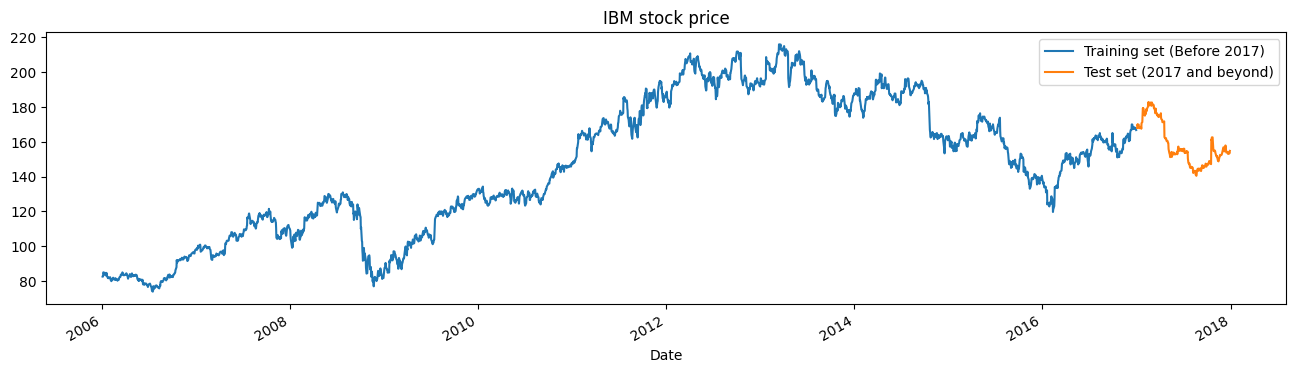

In [3]:
import matplotlib.pyplot as plt
df["High"][:'2016'].plot(figsize=(16, 4), legend=True)
df["High"]['2017':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [4]:
trainning_set = df[:'2016'].iloc[:,1:2].values
test_set = df['2017':].iloc[:,1:2].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(trainning_set)

In [6]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i - 60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

In [8]:
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
85/85 [==============================] - 27s 203ms/step - loss: 0.0214
Epoch 2/50
85/85 [==============================] - 17s 198ms/step - loss: 0.0080
Epoch 3/50
85/85 [==============================] - 17s 199ms/step - loss: 0.0077
Epoch 4/50
85/85 [==============================] - 17s 196ms/step - loss: 0.0066
Epoch 5/50
85/85 [==============================] - 20s 229ms/step - loss: 0.0063
Epoch 6/50
85/85 [==============================] - 17s 195ms/step - loss: 0.0059
Epoch 7/50
85/85 [==============================] - 17s 194ms/step - loss: 0.0060
Epoch 8/50
85/85 [==============================] - 17s 194ms/step - loss: 0.0056
Epoch 9/50
85/85 [==============================] - 17s 199ms/step - loss: 0.0053
Epoch 10/50
85/85 [==============================] - 17s 201ms/step - loss: 0.0047
Epoch 11/50
85/85 [==============================] - 17s 202ms/step - loss: 0.0046
Epoch 12/50
85/85 [==============================] - 17s 202ms/step - loss: 0.0040
Epoch 13/50
8

In [9]:
dataset_total = pd.concat((df["High"][:'2016'],df["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# making the test data
X_test = []
for i in range(60,len(inputs)):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 58ms/step


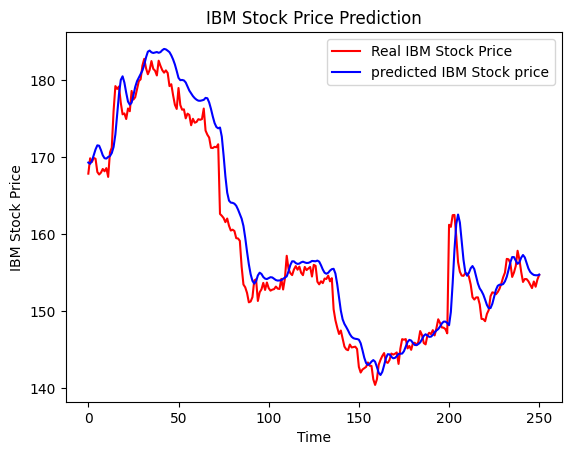

In [10]:
def plot_prediction(test,prediction):
    plt.plot(test,color='red',label="Real IBM Stock Price")
    plt.plot(prediction, color="blue",label="predicted IBM Stock price")
    plt.title("IBM Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("IBM Stock Price")
    plt.legend()
    plt.show()
# now we'll use this function to visualize our test and predicted data

plot_prediction(test_set,predicted_stock_price)

In [11]:
from sklearn.metrics import mean_squared_error
import math
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test,predicted))
    print("The root mean sqaured error is {}.".format(rmse))

return_rmse(test_set,predicted_stock_price)

The root mean sqaured error is 3.023768868758579.


In [12]:
import tensorflow as tf
from keras.layers import GRU
regressorGRU = Sequential()

regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.3))
# Second GRU layer
regressorGRU.add(GRU(units=80, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.1))
# Fourth GRU layer
regressorGRU.add(GRU(units=30, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer='adam',loss='mean_squared_error')

# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
19/19 [==============================] - 21s 588ms/step - loss: 0.0537
Epoch 2/50
19/19 [==============================] - 7s 393ms/step - loss: 0.0098
Epoch 3/50
19/19 [==============================] - 11s 588ms/step - loss: 0.0062
Epoch 4/50
19/19 [==============================] - 7s 389ms/step - loss: 0.0054
Epoch 5/50
19/19 [==============================] - 11s 581ms/step - loss: 0.0049
Epoch 6/50
19/19 [==============================] - 8s 395ms/step - loss: 0.0050
Epoch 7/50
19/19 [==============================] - 11s 584ms/step - loss: 0.0053
Epoch 8/50
19/19 [==============================] - 8s 414ms/step - loss: 0.0044
Epoch 9/50
19/19 [==============================] - 11s 556ms/step - loss: 0.0046
Epoch 10/50
19/19 [==============================] - 9s 470ms/step - loss: 0.0046
Epoch 11/50
19/19 [==============================] - 10s 489ms/step - loss: 0.0040
Epoch 12/50
19/19 [==============================] - 10s 531ms/step - loss: 0.0040
Epoch 13/50
19/19 

In [13]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price1 = regressorGRU.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

8/8 [==============================] - 2s 40ms/step


In [14]:
return_rmse(test_set, predicted_stock_price1)

The root mean sqaured error is 2.8440741279819237.


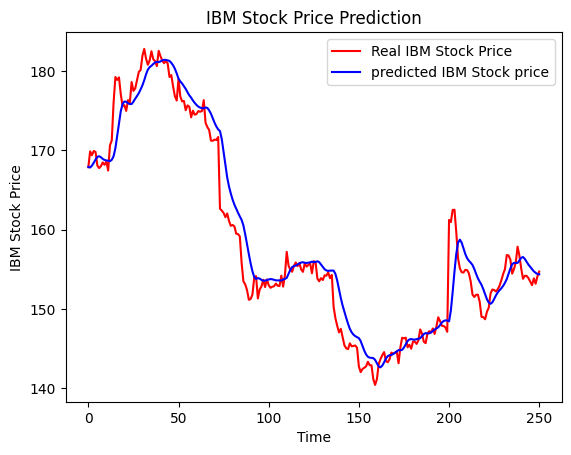

In [15]:
plot_prediction(test_set,predicted_stock_price1)